In [1]:
# Write Your Code Below
# Import all libraries in this cell
import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'requests'

In [4]:
#Data collection
df_CovidconfirmdG = pd.read_csv("covid19_confirmed_global.csv")


In [ ]:
df_CovidconfirmdG

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


In [2]:
df_CovidconfirmdG = df_CovidconfirmdG.dropna(axis=1)

NameError: name 'df_CovidconfirmdG' is not defined

In [3]:
df_CovidconfirmdG

NameError: name 'df_CovidconfirmdG' is not defined

In [795]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1144 entries, Country/Region to 3/9/23
dtypes: int64(1143), object(1)
memory usage: 2.5+ MB


In [796]:
df[['Country/Region']] = df[['Country/Region']].astype("string")

In [797]:
#Delete column with o value 
df = df.loc[:, (df != 0).any(axis=0)]

In [798]:
df

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,Albania,0,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,Algeria,0,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,Andorra,0,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,Angola,0,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,Winter Olympics 2022,0,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,Yemen,0,0,0,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,Zambia,0,0,0,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


In [799]:
dff = pd.read_csv("covid19_recovered_global.csv")

In [800]:
dff

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
272,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [801]:
dff = dff.loc[:, (dff != 0).any(axis=0)]

In [802]:
dff

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/3/21,8/4/21,9/13/22,9/14/22,9/15/22,9/16/22,9/17/22,9/18/22,9/19/22,9/20/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,82586,82586,0,0,0,0,0,0,0,0
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,130291,130314,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,117557,118409,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,14348,14380,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,39389,39582,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,312289,312320,0,0,0,0,0,0,0,0
270,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,4232,4251,0,0,0,0,0,0,0,0
272,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,189341,189658,0,0,0,0,0,0,0,0


In [340]:
dff = dff.dropna(axis=1)

In [341]:
dff

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Albania,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Algeria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Andorra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,Winter Olympics 2022,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271,Yemen,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
272,Zambia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [342]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Columns: 1144 entries, Country/Region to 3/9/23
dtypes: int64(1143), object(1)
memory usage: 2.4+ MB


In [344]:
dff[['Country/Region']] = dff[['Country/Region']].astype("string")

In [345]:
dfff = pd.read_csv("covid19_deaths_global.csv")

In [346]:
dfff

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,4057,4057,4057,4057,4057,4057,4057,4057,4057,4057


In [803]:
#Delete column with o value 
dfff = dfff.loc[:, (dfff != 0).any(axis=0)]

In [804]:
dfff = dfff.dropna(axis=1)

In [805]:
dfff[['Country/Region']] = dfff[['Country/Region']].astype("string")

In [806]:
dfff

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,Albania,0,0,0,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,Algeria,0,0,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,Andorra,0,0,0,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,Angola,0,0,0,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,Winter Olympics 2022,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,Yemen,0,0,0,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,Zambia,0,0,0,0,0,0,0,0,0,...,4057,4057,4057,4057,4057,4057,4057,4057,4057,4057


In [807]:
dfff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1144 entries, Country/Region to 3/9/23
dtypes: int64(1143), string(1)
memory usage: 2.5 MB


In [808]:
dffff = pd.read_csv("covid_external.csv")

In [809]:
dffff

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84
5,Benue,North Central,6376000,0.5,0.7,0.5,0.7,0.4,0.4,0.3,0.5,0.91
6,Kogi,North Central,4970000,0.1,0.3,0.2,0.5,0.5,0.4,0.3,0.6,0.87
7,Bauchi,North East,7270000,0.8,0.1,0.2,0.8,0.8,0.2,0.8,0.8,0.85
8,Gombe,North East,3692000,1.0,0.4,0.4,0.9,0.9,0.3,0.8,0.7,0.83
9,Borno,North East,6651000,0.9,0.3,0.1,1.0,1.0,0.1,0.7,0.9,0.89


In [810]:
dffff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   37 non-null     object 
 1   region                   37 non-null     object 
 2   Population               37 non-null     int64  
 3   Overall CCVI Index       37 non-null     float64
 4   Age                      37 non-null     float64
 5   Epidemiological          37 non-null     float64
 6   Fragility                37 non-null     float64
 7   Health System            37 non-null     float64
 8   Population Density       37 non-null     float64
 9   Socio-Economic           37 non-null     float64
 10   Transport Availability  37 non-null     float64
 11  Acute IHR                37 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 3.6+ KB


In [811]:
#Delete column with o value 
dffff = dffff.loc[:, (dffff != 0).any(axis=0)]

In [812]:
dffff = dffff.dropna(axis=1)

In [813]:
dffff[['states', 'region']] = dffff[['states', 'region']].astype("string")

In [866]:
dffff[['Age', 'Health System', 'Acute IHR', 'Overall CCVI Index']] = dffff[['Age', 'Health System', 'Acute IHR', 'Overall CCVI Index']].replace(',', '', regex=True).astype(int)

In [867]:
dffff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   37 non-null     string 
 1   region                   37 non-null     string 
 2   Population               37 non-null     int64  
 3   Overall CCVI Index       37 non-null     int32  
 4   Age                      37 non-null     int32  
 5   Epidemiological          37 non-null     float64
 6   Fragility                37 non-null     float64
 7   Health System            37 non-null     int32  
 8   Population Density       37 non-null     float64
 9   Socio-Economic           37 non-null     float64
 10   Transport Availability  37 non-null     float64
 11  Acute IHR                37 non-null     int32  
dtypes: float64(5), int32(4), int64(1), string(2)
memory usage: 3.0 KB


In [864]:
dfdf = pd.read_csv("covidnig.csv")

In [865]:
dfdf

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"26,708","2,435","24,037",236
1,FCT,"9,627","2,840","6,694",93
2,Kaduna,"4,504",579,"3,877",48
3,Plateau,"4,262",280,"3,948",34
4,Oyo,"3,788",368,"3,374",46
5,Rivers,"3,279",232,"2,987",60
6,Edo,"2,768",52,"2,603",113
7,Ogun,"2,382",174,"2,175",33
8,Kano,"2,032",198,"1,778",56
9,Delta,"1,843",57,"1,737",49


In [817]:
#Delete column with o value 
dfdf = dfdf.loc[:, (dfdf != 0).any(axis=0)]

In [818]:
#drop null value: NA
dfdf = dfdf.dropna(axis=1)

In [819]:
#convert to string
dfdf[['States Affected']] = dfdf[['States Affected']].astype("string")

In [838]:
dfdf[['No. of Cases (Lab Confirmed)', 'No. of Cases (on admission)', 'No. Discharged']] = dfdf[['No. of Cases (Lab Confirmed)', 'No. of Cases (on admission)', 'No. Discharged']].replace(',', '', regex=True).astype(int)



In [839]:
dfdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     string
 1   No. of Cases (Lab Confirmed)  37 non-null     int32 
 2   No. of Cases (on admission)   37 non-null     int32 
 3   No. Discharged                37 non-null     int32 
 4   No. of Deaths                 37 non-null     int64 
dtypes: int32(3), int64(1), string(1)
memory usage: 1.1 KB


In [760]:
dfdf

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"26,708","2,435","24,037",236
1,FCT,"9,627","2,840","6,694",93
2,Kaduna,"4,504",579,"3,877",48
3,Plateau,"4,262",280,"3,948",34
4,Oyo,"3,788",368,"3,374",46
5,Rivers,"3,279",232,"2,987",60
6,Edo,"2,768",52,"2,603",113
7,Ogun,"2,382",174,"2,175",33
8,Kano,"2,032",198,"1,778",56
9,Delta,"1,843",57,"1,737",49


In [369]:
dfdff = pd.read_csv("Budget data.csv")


In [370]:
dfdff

,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00
5,Bayelsa,242.18,183.15
6,Benue,189.00,119.00
7,Borno,146.80,108.80
8,Cross River,1100.00,147.10
9,Delta,395.50,282.30


In [130]:
dfdff[['states']] = dfdff[['states']].astype("string")

In [131]:
dfdff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               37 non-null     string 
 1   Initial_budget (Bn)  37 non-null     float64
 2   Revised_budget (Bn)  37 non-null     float64
dtypes: float64(2), string(1)
memory usage: 1016.0 bytes


In [371]:
dfdfff = pd.read_csv("RealGDP.csv")


In [133]:
dfdfff.head()

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59


In [372]:
dfdfff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    7 non-null      int64  
 1   Q1      7 non-null      float64
 2   Q2      7 non-null      float64
 3   Q3      7 non-null      float64
 4   Q4      7 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 408.0 bytes


# Get a Pandas DataFrame for Daily Confirmed Cases in Nigeria. Columns are Date and Cases

In [386]:
df.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,Albania,0,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,Algeria,0,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,Andorra,0,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,Angola,0,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [374]:
df.describe()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
count,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,...,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02
mean,1.927336,2.273356,3.266436,4.972318,7.335640,10.134948,19.307958,21.346021,28.501730,34.349481,...,2.336755e+06,2.337519e+06,2.338173e+06,2.338805e+06,2.338992e+06,2.339187e+06,2.339387e+06,2.339839e+06,2.340460e+06,2.341073e+06
std,26.173664,26.270191,32.707271,45.523871,63.623197,85.724481,210.329649,211.628535,291.630499,345.759248,...,8.506608e+06,8.511285e+06,8.514488e+06,8.518031e+06,8.518408e+06,8.518645e+06,8.519346e+06,8.521641e+06,8.524968e+06,8.527765e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04,1.456700e+04
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05,1.032480e+05
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.051998e+06,1.052122e+06,1.052247e+06,1.052382e+06,1.052519e+06,1.052664e+06,1.052664e+06,1.052926e+06,1.053068e+06,1.053213e+06
max,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,4903.000000,5806.000000,...,1.034435e+08,1.035339e+08,1.035898e+08,1.036487e+08,1.036508e+08,1.036470e+08,1.036555e+08,1.036909e+08,1.037558e+08,1.038027e+08


In [375]:
df.columns

Index(['Country/Region', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20',
       '1/27/20', '1/28/20', '1/29/20', '1/30/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1144)

In [632]:
df.head()

Date,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,Albania,0,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,Algeria,0,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,Andorra,0,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,Angola,0,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


# Confirmed Cases

In [642]:
# applying groupby() function to
# group the data on Country/Region value.
ConCase = df.groupby('Country/Region')

In [643]:
ConCase

# World Confirm cases

In [644]:
# print the first entries in all the groups formed.
ConCase.first()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
Albania,0,0,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
Algeria,0,0,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
Andorra,0,0,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
Angola,0,0,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
Yemen,0,0,0,0,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945


# National confirmed Covid19 cases

In [392]:
# Finding the values contained in the "Nigeria" group
ConCase.get_group('Nigeria')

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
206,Nigeria,0,0,0,0,0,0,0,0,0,...,266593,266598,266598,266598,266598,266598,266598,266598,266598,266598


In [397]:
dfCnCase = ConCase.get_group('Nigeria')

In [484]:
dfCnCase

Date,Country/Region,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
206,Nigeria,1,1,1,1,1,1,1,1,1,...,266593,266598,266598,266598,266598,266598,266598,266598,266598,266598


In [485]:
#Delete column with o value 
dfCnCase = dfCnCase.loc[:, (dfCnCase != 0).any(axis=0)]

In [486]:
dfCnCase

Date,Country/Region,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
206,Nigeria,1,1,1,1,1,1,1,1,1,...,266593,266598,266598,266598,266598,266598,266598,266598,266598,266598


In [487]:
dfCnCase_transposed = dfCnCase.transpose()

In [402]:
dfCnCase_transposed.index.name = 'Date'

In [488]:
dfCnCase_transposed = dfCnCase_transposed.drop(index=dfCnCase_transposed.index[0])

In [489]:
dfCnCase_transposed

,206
Date,
2/28/20,1
2/29/20,1
3/1/20,1
3/2/20,1
3/3/20,1
...,...
3/5/23,266598
3/6/23,266598
3/7/23,266598


In [405]:
dfCnCase_transposed.columns = ['Cases']

# Daily NAtional Covid19 confirmed cases

In [483]:
dfCnCase_transposed

,Cases
Date,
2/28/20,1
2/29/20,1
3/1/20,1
3/2/20,1
3/3/20,1
...,...
3/5/23,266598
3/6/23,266598
3/7/23,266598


# Recovered Cases

In [407]:
# applying groupby() function to
# group the data on 'Country/Region value.
RecCase = dff.groupby('Country/Region')

# World Covid19 Recovered cases

In [408]:
# print the first entries in all the groups formed.
RecCase.first()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albania,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Algeria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Angola,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [409]:
# Finding the values contained in the "Nigeria" group
RecCase.get_group('Nigeria')

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
191,Nigeria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [414]:
dfRecCase = RecCase.get_group('Nigeria')

# National Covid19 Recovered cases

In [415]:
dfRecCase

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
191,Nigeria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [416]:
#Delete column with o value 
dfRecCase = dfRecCase.loc[:, (dfRecCase != 0).any(axis=0)]

In [417]:
dfRecCase

,Country/Region,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,...,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
191,Nigeria,1,1,1,1,2,2,2,2,2,...,164798,164837,164886,164930,164978,164994,165005,165037,165122,165208


In [418]:
dfRecCase_transposed = dfRecCase.transpose()

In [419]:
dfRecCase_transposed.index.name = 'Date'

In [420]:
dfRecCase_transposed = dfRecCase_transposed.drop(index=dfRecCase_transposed.index[0])

In [421]:
dfRecCase_transposed.columns = ['Cases']

# Daily NAtional Recovered Covid19 cases

In [423]:
dfRecCase_transposed

,Cases
Date,
3/18/20,1
3/19/20,1
3/20/20,1
3/21/20,1
3/22/20,2
...,...
7/31/21,164994
8/1/21,165005
8/2/21,165037


# Deaths Cases

In [424]:
# applying groupby() function to
# group the data on 'Country/Region value.
DeathCase = dfff.groupby('Country/Region')

# World Covid19 Death cases

In [425]:
# print the first entries in all the groups formed.
DeathCase.first()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
Albania,0,0,0,0,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
Algeria,0,0,0,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
Andorra,0,0,0,0,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
Angola,0,0,0,0,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159


In [426]:
# Finding the values contained in the "Nigeria" group
DeathCase.get_group('Nigeria')

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
206,Nigeria,0,0,0,0,0,0,0,0,0,...,3155,3155,3155,3155,3155,3155,3155,3155,3155,3155


In [427]:
dfDeathCase = DeathCase.get_group('Nigeria')

# NAtional Covid19 Death cases

In [428]:
dfDeathCase

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
206,Nigeria,0,0,0,0,0,0,0,0,0,...,3155,3155,3155,3155,3155,3155,3155,3155,3155,3155


In [429]:
#Delete column with o value 
dfDeathCase = dfDeathCase.loc[:, (dfDeathCase != 0).any(axis=0)]

In [430]:
dfDeathCase

,Country/Region,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
206,Nigeria,1,1,1,1,1,1,1,2,2,...,3155,3155,3155,3155,3155,3155,3155,3155,3155,3155


In [431]:
dfDeathCase_transposed = dfDeathCase.transpose()

In [432]:
dfDeathCase_transposed.index.name = 'Date'

In [433]:
dfDeathCase_transposed = dfDeathCase_transposed.drop(index=dfDeathCase_transposed.index[0])

In [434]:
dfDeathCase_transposed.columns = ['Cases']

# Daily National Covid19 cases

In [435]:
dfDeathCase_transposed

,Cases
Date,
3/23/20,1
3/24/20,1
3/25/20,1
3/26/20,1
3/27/20,1
...,...
3/5/23,3155
3/6/23,3155
3/7/23,3155


# External

In [436]:
# applying groupby() function to
# group the data on states value.
Covid_ext = dffff.groupby('states')

In [437]:
# print the first entries in all the groups formed.
Covid_ext.first()

,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
states,,,,,,,,,,,
Abia,South East,4190000,0.2,0.9,0.6,0.1,0.3,0.9,0.2,0.0,1.14
Adamawa,North East,4672000,0.8,0.5,0.6,0.9,0.7,0.3,0.7,0.6,0.94
Akwa Ibom,South East,6093000,0.7,0.8,0.7,0.6,0.8,0.8,0.5,0.1,1.01
Anambra,South East,6050000,0.6,0.9,1.0,0.6,0.2,1.0,0.0,0.1,1.08
Bauchi,North East,7270000,0.8,0.1,0.2,0.8,0.8,0.2,0.8,0.8,0.85
Bayelsa,South South,2606000,0.5,0.8,0.6,0.1,0.9,0.5,0.2,0.7,1.00
Benue,North Central,6376000,0.5,0.7,0.5,0.7,0.4,0.4,0.3,0.5,0.91
Borno,North East,6651000,0.9,0.3,0.1,1.0,1.0,0.1,0.7,0.9,0.89
Cross river,South South,4272000,0.5,0.4,0.7,0.8,0.1,0.4,0.4,0.6,0.98


# Budget

In [438]:
# applying groupby() function to
# group the data on states value.
Covid_budget = dfdff.groupby('states')

In [439]:
Covid_budget.first()

,Initial_budget (Bn),Revised_budget (Bn)
states,,
Abia,136.60,102.70
Adamawa,183.30,139.31
Akwa-Ibom,597.73,366.00
Anambra,137.10,112.80
Bauchi,167.20,128.00
Bayelsa,242.18,183.15
Benue,189.00,119.00
Borno,146.80,108.80
Cross River,1100.00,147.10


# CovidNig

In [440]:
# applying groupby() function to
# group the data on states value.
Covid_Nig = dfdf.groupby('States Affected')

In [443]:
Covid_Nig.first()

,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
States Affected,,,,
Abia,980,25,945,10
Adamawa,355,96,238,21
Akwa Ibom,395,44,342,9
Anambra,299,6,274,19
Bauchi,897,108,775,14
Bayelsa,497,55,421,21
Benue,515,44,460,11
Borno,778,37,705,36
Cross River,93,1,81,11


# Top 10 states for Covid_confirmed cases

In [243]:
top_10_confirmd = dfdf.nlargest(10, 'No. of Cases (Lab Confirmed)')

In [244]:
top_10_confirmd 

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
2,Kaduna,4504,579,3877,48
3,Plateau,4262,280,3948,34
4,Oyo,3788,368,3374,46
5,Rivers,3279,232,2987,60
6,Edo,2768,52,2603,113
7,Ogun,2382,174,2175,33
8,Kano,2032,198,1778,56
9,Delta,1843,57,1737,49


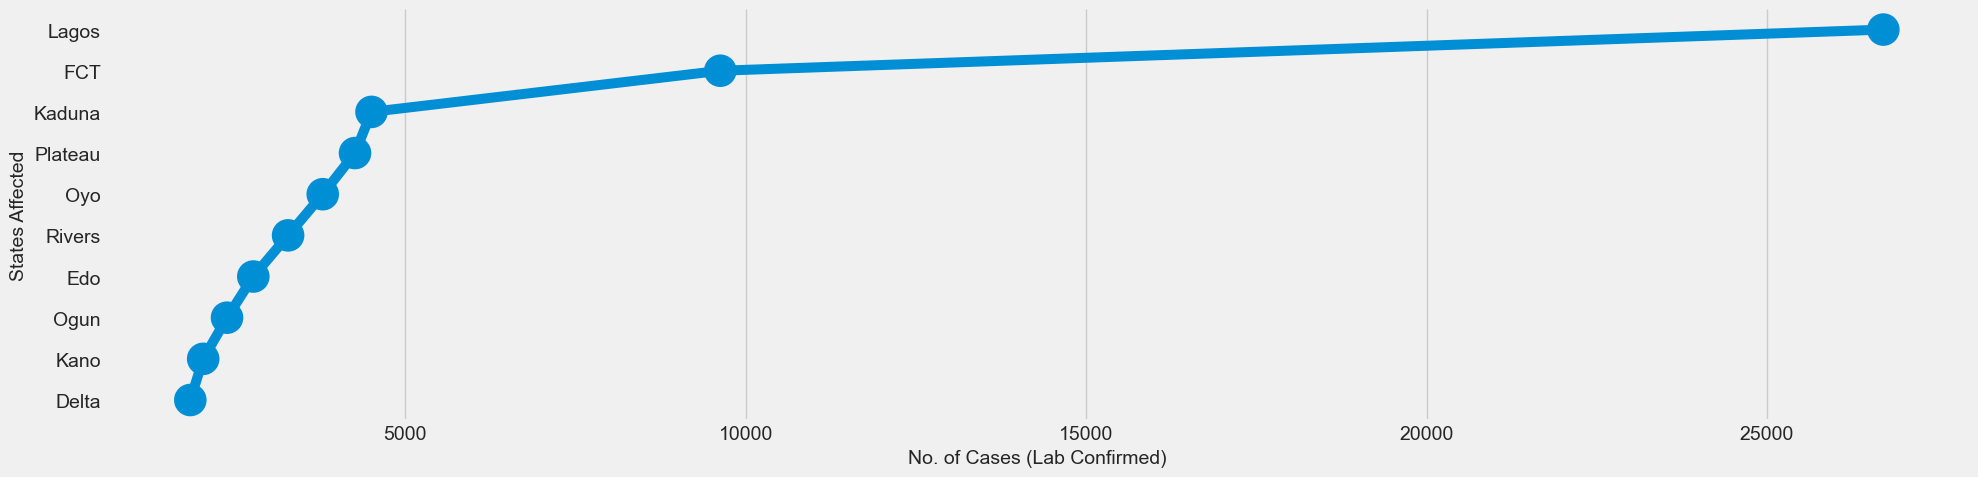

In [245]:
sns.catplot(kind = 'point', data = top_10_confirmd, x = 'No. of Cases (Lab Confirmed)', y = 'States Affected', aspect = 4)

# Top 10  Discharged Covid cases.

In [790]:
top_10_Discharged = dfdf.nlargest(10, 'No. Discharged')

TypeError: Column 'No. Discharged' has dtype object, cannot use method 'nlargest' with this dtype

In [247]:
top_10_Discharged

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
3,Plateau,4262,280,3948,34
2,Kaduna,4504,579,3877,48
4,Oyo,3788,368,3374,46
5,Rivers,3279,232,2987,60
6,Edo,2768,52,2603,113
7,Ogun,2382,174,2175,33
8,Kano,2032,198,1778,56
9,Delta,1843,57,1737,49


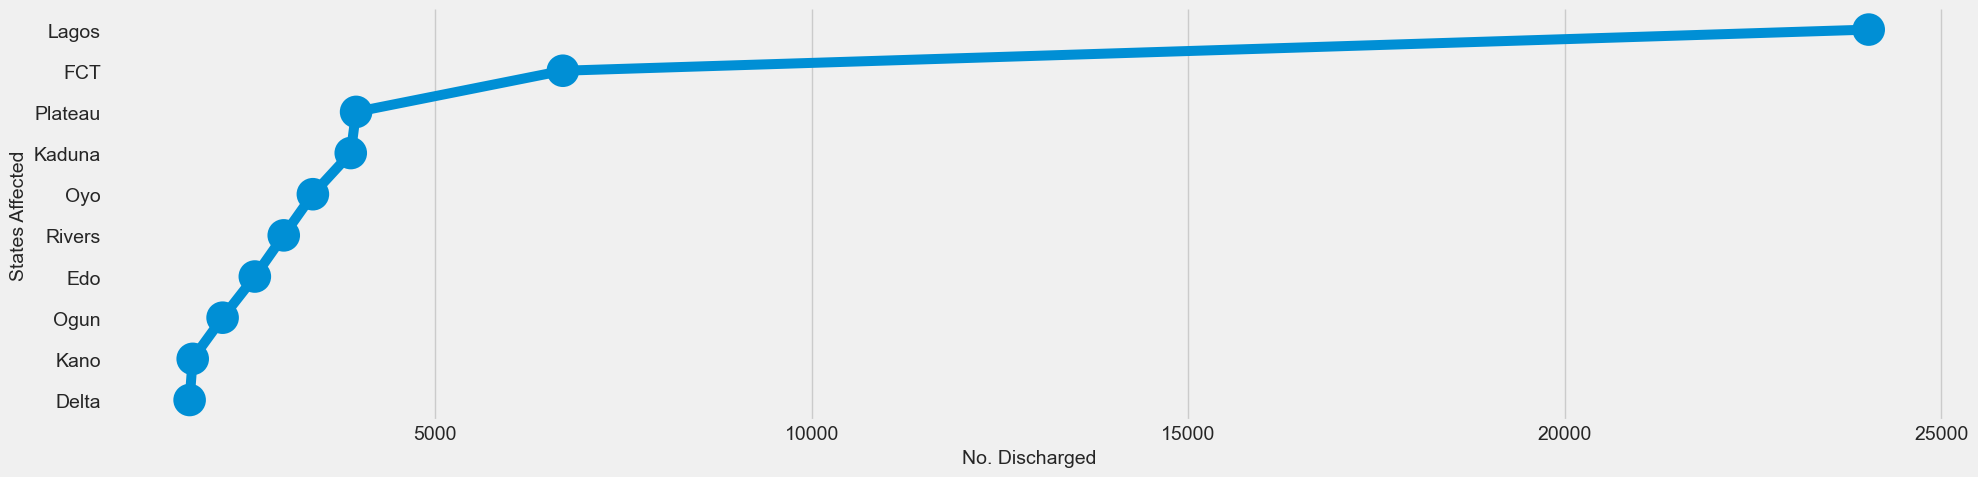

In [248]:
sns.catplot(kind = 'point', data = top_10_Discharged, x = 'No. Discharged', y = 'States Affected', aspect = 4)

# top 10 Death cases

In [249]:
top_10_Death= dfdf.nlargest(10, 'No. of Deaths')

In [250]:
top_10_Death

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,26708,2435,24037,236
6,Edo,2768,52,2603,113
1,FCT,9627,2840,6694,93
5,Rivers,3279,232,2987,60
8,Kano,2032,198,1778,56
9,Delta,1843,57,1737,49
2,Kaduna,4504,579,3877,48
4,Oyo,3788,368,3374,46
10,Ondo,1793,62,1690,41
19,Borno,778,37,705,36


<Axes: ylabel='top_10_Death'>

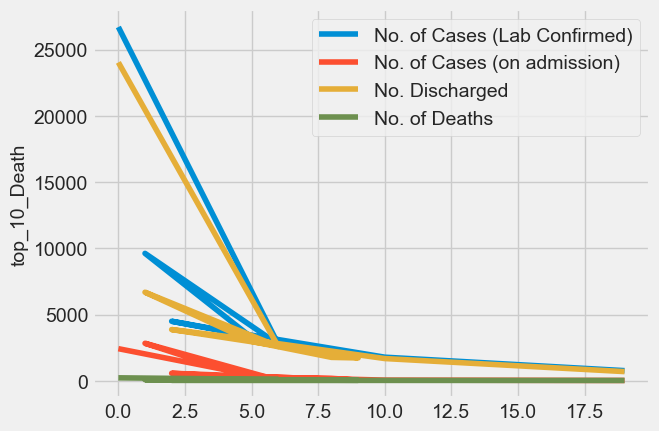

In [474]:
top_10_Death.plot(kind='line', ylabel = 'top_10_Death')

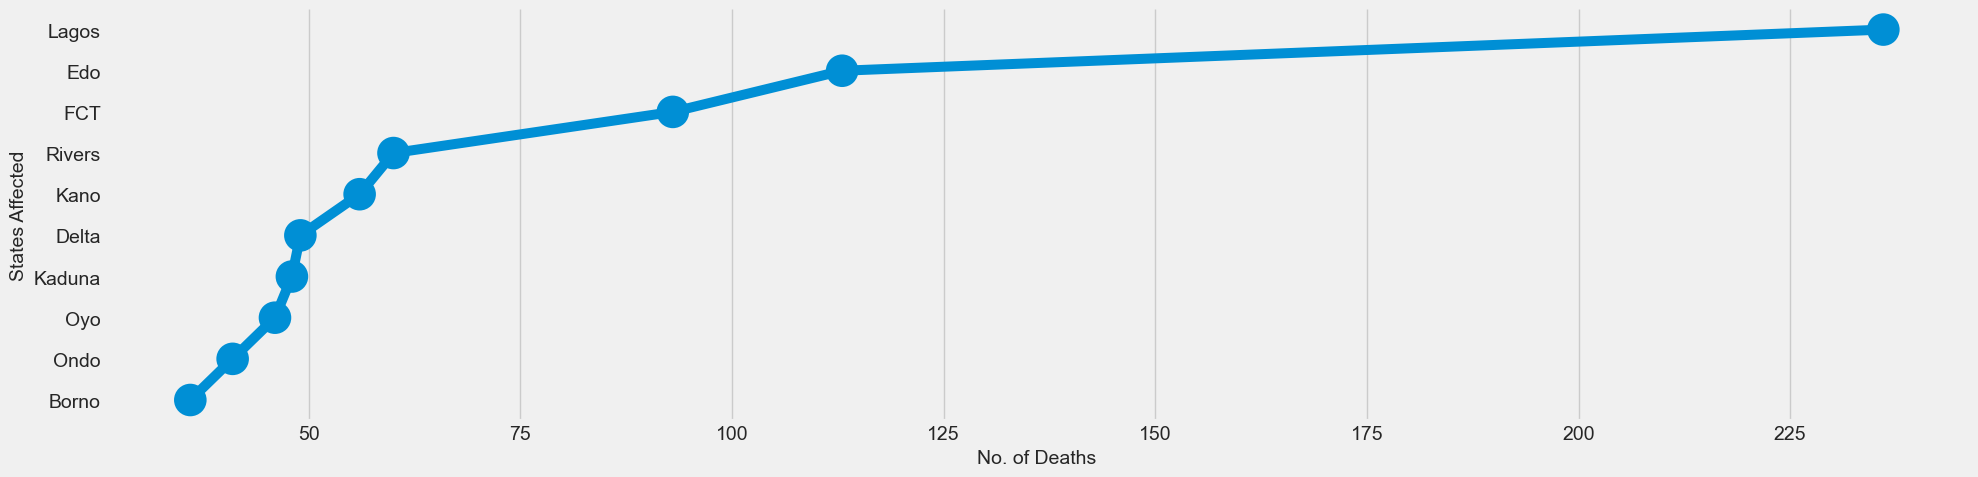

In [252]:
sns.catplot(kind = 'point', data = top_10_Death, x = 'No. of Deaths', y = 'States Affected', aspect = 4)

# Line plot for the total daily confirmed, recovered and death cases in Nigeria

In [444]:
dfCnCase_transposed

,Cases
Date,
2/28/20,1
2/29/20,1
3/1/20,1
3/2/20,1
3/3/20,1
...,...
3/5/23,266598
3/6/23,266598
3/7/23,266598


In [446]:
dfRecCase_transposed

,Cases
Date,
3/18/20,1
3/19/20,1
3/20/20,1
3/21/20,1
3/22/20,2
...,...
7/31/21,164994
8/1/21,165005
8/2/21,165037


In [447]:
dfDeathCase_transposed

,Cases
Date,
3/23/20,1
3/24/20,1
3/25/20,1
3/26/20,1
3/27/20,1
...,...
3/5/23,3155
3/6/23,3155
3/7/23,3155


In [452]:
# combine the DataFrames vertically
dfcombined_Cases = pd.concat([dfCnCase_transposed, dfRecCase_transposed, dfDeathCase_transposed], axis=1)

In [453]:
dfcombined_Cases

,Cases,Cases,Cases
Date,,,
2/28/20,1,NaN,NaN
2/29/20,1,NaN,NaN
3/1/20,1,NaN,NaN
3/2/20,1,NaN,NaN
3/3/20,1,NaN,NaN
...,...,...,...
3/5/23,266598,NaN,3155
3/6/23,266598,NaN,3155
3/7/23,266598,NaN,3155


In [457]:
dfcombined_Cases = dfcombined_Cases.fillna(0)

In [458]:
dfcombined_Cases

,Cases,Cases,Cases
Date,,,
2/28/20,1,0,0
2/29/20,1,0,0
3/1/20,1,0,0
3/2/20,1,0,0
3/3/20,1,0,0
...,...,...,...
3/5/23,266598,0,3155
3/6/23,266598,0,3155
3/7/23,266598,0,3155


In [459]:
dfcombined_Cases.columns = ['Confirmed_Case', 'Recovered_Case', 'DeathCase_Case']

In [460]:
dfcombined_Cases

,Confirmed_Case,Recovered_Case,DeathCase_Case
Date,,,
2/28/20,1,0,0
2/29/20,1,0,0
3/1/20,1,0,0
3/2/20,1,0,0
3/3/20,1,0,0
...,...,...,...
3/5/23,266598,0,3155
3/6/23,266598,0,3155
3/7/23,266598,0,3155


<Axes: xlabel='Date', ylabel='Total Confirmed, Recovered & Death cases'>

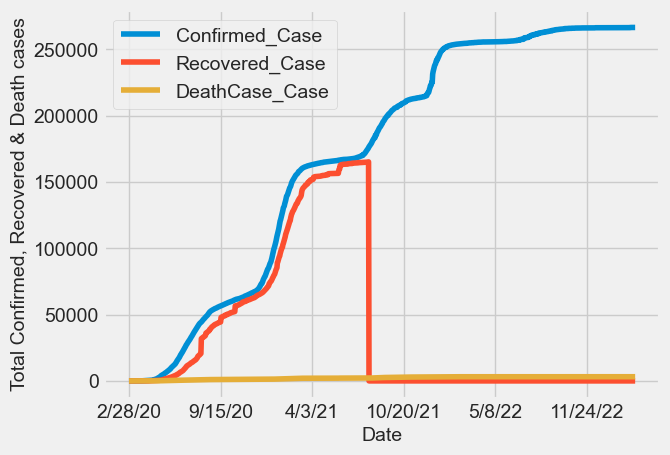

In [472]:
dfcombined_Cases.plot(kind='line', ylabel = 'Total Confirmed, Recovered & Death cases')

# Determine the daily infection rate

In [676]:
ConCase

In [708]:
dffConCase = ConCase.first()

In [709]:
dffConCase

Date,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
Albania,0,0,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
Algeria,0,0,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
Andorra,0,0,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
Angola,0,0,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
Yemen,0,0,0,0,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945


In [710]:
dffConCaseDiff = dffConCase.diff()

In [711]:
dffConCaseDiff

Date,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,125069.0,125068.0,125050.0,125065.0,125058.0,125037.0,125021.0,124991.0,124992.0,125006.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-62950.0,-62960.0,-62945.0,-62958.0,-62958.0,-62950.0,-62950.0,-62937.0,-62949.0,-62961.0
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-223575.0,-223573.0,-223588.0,-223594.0,-223594.0,-223602.0,-223602.0,-223615.0,-223604.0,-223606.0
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,57389.0,57402.0,57402.0,57402.0,57402.0,57402.0,57402.0,57402.0,57398.0,57398.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,-10823689.0,-10823698.0,-10823709.0,-10823722.0,-10823734.0,-10823738.0,-10823738.0,-10823758.0,-10823766.0,-10823766.0
Winter Olympics 2022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-702693.0,-702693.0,-702693.0,-702693.0,-702693.0,-702693.0,-702693.0,-702693.0,-702693.0,-702693.0
Yemen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11410.0,11410.0,11410.0,11410.0,11410.0,11410.0,11410.0,11410.0,11410.0,11410.0


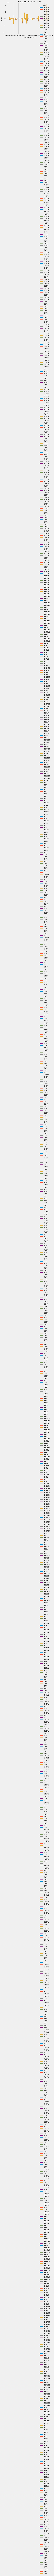

In [715]:
dffConCaseDiff.plot()
plt.xlabel('Daily Infection Rate')
plt.ylabel('Date')
plt.title('Total Daily Infection Rate')
plt.show()

In [754]:
# Calculate the maximum infection rate for each day
max_infection_rate = dffConCaseDiff.iloc[:, 1:].max(axis=1)

In [755]:
max_infection_rate

Country/Region
Afghanistan                  NaN
Albania                 136342.0
Algeria                  52524.0
Andorra                      0.0
Angola                   64891.0
                          ...   
West Bank and Gaza      301322.0
Winter Olympics 2022         0.0
Yemen                    11410.0
Zambia                  331190.0
Zimbabwe                     1.0
Length: 201, dtype: float64

In [756]:
# Get the maximum infection rate value
max_rate_value = max_infection_rate.max()

In [757]:
max_rate_value

103799897.0

In [758]:
date_of_max_infection = dffConCaseDiff.max().idxmax()

In [759]:
date_of_max_infection

'3/9/23'

In [766]:
dffff.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [764]:
dfdf.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"26,708","2,435","24,037",236
1,FCT,"9,627","2,840","6,694",93
2,Kaduna,"4,504",579,"3,877",48
3,Plateau,"4,262",280,"3,948",34
4,Oyo,"3,788",368,"3,374",46


In [868]:
top_10_dffff = dffff.nlargest(10, 'Overall CCVI Index') 

In [869]:
top_10_dffff

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
8,Gombe,North East,3692000,1,0,0.4,0.9,0,0.3,0.8,0.7,0
11,Yobe,North East,3723000,1,0,0.3,1.0,0,0.0,0.9,1.0,0
0,FCT,North Central,4865000,0,0,0.9,0.4,0,0.9,0.6,0.2,0
1,Plateau,North Central,4766000,0,0,0.4,0.8,0,0.3,0.5,0.3,0
2,Kwara,North Central,3524000,0,0,0.3,0.2,0,0.2,0.6,0.7,0
3,Nassarawa,North Central,2783000,0,0,0.5,0.9,0,0.1,0.6,0.5,0
4,Niger,North Central,6260000,0,0,0.6,0.3,0,0.1,0.8,0.8,0
5,Benue,North Central,6376000,0,0,0.5,0.7,0,0.4,0.3,0.5,0
6,Kogi,North Central,4970000,0,0,0.2,0.5,0,0.4,0.3,0.6,0
7,Bauchi,North East,7270000,0,0,0.2,0.8,0,0.2,0.8,0.8,0


In [858]:
#change the column name to match the other dataset
dfdf.rename(columns={'States Affected': 'states'}, inplace=True)

In [859]:
top_10_dfdf = dfdf.nlargest(10, 'No. of Cases (Lab Confirmed)') 

In [860]:
top_10_dfdf

,states,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
2,Kaduna,4504,579,3877,48
3,Plateau,4262,280,3948,34
4,Oyo,3788,368,3374,46
5,Rivers,3279,232,2987,60
6,Edo,2768,52,2603,113
7,Ogun,2382,174,2175,33
8,Kano,2032,198,1778,56
9,Delta,1843,57,1737,49


In [870]:
# merge both datasets using their common column name
merged_top10 = pd.merge(top_10_dffff, top_10_dfdf, on='states')

In [871]:
merged_top10

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,FCT,North Central,4865000,0,0,0.9,0.4,0,0.9,0.6,0.2,0,9627,2840,6694,93
1,Plateau,North Central,4766000,0,0,0.4,0.8,0,0.3,0.5,0.3,0,4262,280,3948,34


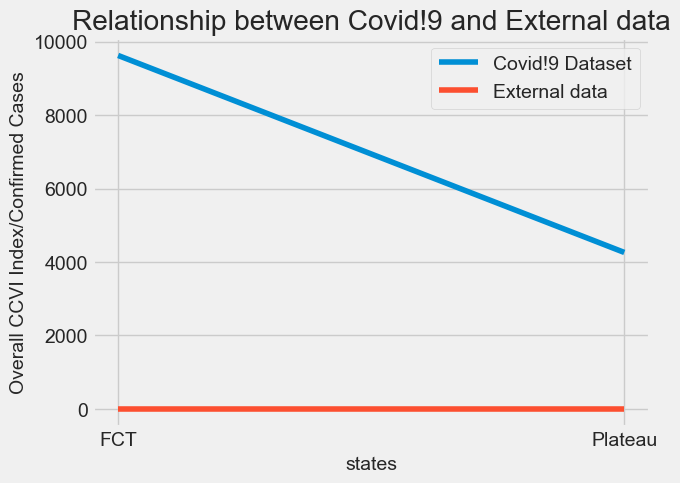

In [874]:
#Line plot
plt.plot(merged_top10['states'], merged_top10['No. of Cases (Lab Confirmed)'], label='Covid!9 Dataset')
plt.plot(merged_top10['states'], merged_top10['Overall CCVI Index'], label='External data')
plt.xlabel('states')
plt.ylabel('Overall CCVI Index/Confirmed Cases')
plt.title('Relationship between Covid!9 and External data')
plt.legend()

Text(0.5, 1.0, 'Regression Plot: Population vs. No. of Cases (Lab Confirmed)')

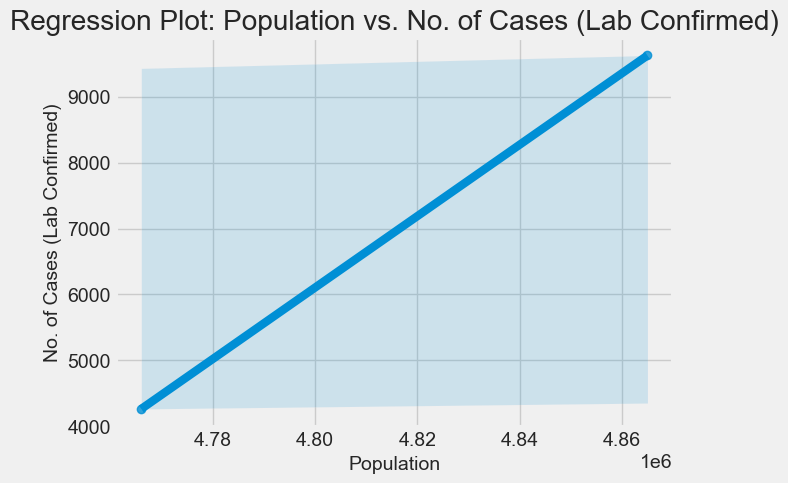

In [875]:
# Generate a regression plot
sns.regplot(x='Population', y='No. of Cases (Lab Confirmed)', data=merged_top10)

# Add labels and title
plt.xlabel('Population')
plt.ylabel('No. of Cases (Lab Confirmed)')
plt.title('Regression Plot: Population vs. No. of Cases (Lab Confirmed)')
